# SOCI 415 Demo: An Introduction to Vectorization and Classification
*Krishaant Pathman, Kaiyan Zhang.*

## Part 1: Text Classification with TfidfVectorizer and Naive Bayes
This part of the notebook demonstrates how do we deal with text data in python using the TfidfVectorizer and the Naive Bayes classifier from the "Scikit-Learn" python library to classify text data.

We start with a small dataset of text data and their corresponding labels. Below we generated a small dataset of statements related to three different family theories, "Social Exchange Theory", "Symbolic Interaction Theory" and "Feminist Theory". The goal is to use the TfidfVectorizer to convert the text data into a numerical format that can be used by the Naive Bayes classifier to classify the text data into one of the three theories. 

In [1]:
import pandas as pd

# We will create a DataFrame with 60 statements, each labeled with one of three theories:
texts = [
    # — 20 Social Exchange sentences —
    "Family members negotiate chores based on perceived fairness",
    "Parents reward children for good grades expecting future compliance",
    "Siblings exchange favors to maintain harmonious relationships",
    "Couples balance emotional support with personal sacrifices",
    "In-laws offer assistance in exchange for social acceptance",
    "Elders share wisdom anticipating respect and care in return",
    "Family dinners serve as a currency of bonding and gratitude",
    "Gifts are given to nurture ties and secure reciprocation",
    "Time spent with relatives is weighed against personal needs",
    "Emotional closeness is maintained through mutual reciprocity",
    "Household resources are allocated based on negotiated agreements",
    "Acts of kindness within the family are investments in trust",
    "Children help with errands expecting parental approval",
    "Spouses trade support during stress for long-term stability",
    "Neighbors become kin through mutual favors and exchanges",
    "Holiday traditions are upheld as social investments",
    "Financial help is offered with expectations of loyalty",
    "Emotional labor is exchanged silently between partners",
    "Family decisions hinge on cost benefit analyses of outcomes",
    "Support networks are built through repeated altruistic acts",

    # — 20 Symbolic Interaction sentences —
    "Family greetings establish meaning through repeated gestures",
    "Parent-child bonds deepen through shared storytelling rituals",
    "Teens redefine family roles via evolving social interactions",
    "Grandparents express affection through symbolic tokens",
    "Household rules are understood through everyday conversations",
    "Names and titles convey power dynamics within the family",
    "Mealtime rituals reinforce a shared family identity",
    "Stories of ancestors shape children's sense of belonging",
    "Silence can signal respect or tension depending on context",
    "Photographs act as symbols of collective memory",
    "Handshakes and hugs reflect different cultural meanings",
    "Family pets become symbols of unity and care",
    "Celebrations like birthdays communicate love and value",
    "Sibling rivalries are played out through symbolic gestures",
    "Language choices reveal shifting roles in blended families",
    "Home decor expresses family history and shared values",
    "Inside jokes create private family languages",
    "Emojis used in family texts carry nuanced meanings",
    "Holiday decorations symbolize cultural and familial heritage",
    "Family nicknames evolve as roles and relationships change",

    # — 20 Feminist Theory sentences —
    "Gendered expectations dictate who cooks and who cleans",
    "Patriarchal norms assign decision-making to male heads",
    "Daughters often bear the brunt of emotional labor",
    "Mothers balance career ambitions with caregiving demands",
    "Fathers' involvement challenges traditional gender roles",
    "Household chores reflect underlying gender hierarchies",
    "Income disparity influences power distribution at home",
    "Single mothers navigate economic constraints daily",
    "Gender bias emerges in parental encouragement of careers",
    "Marriage often reinforces stereotypical gender divisions",
    "Domestic violence is perpetuated by unequal power dynamics",
    "Women's unpaid labor sustains family well-being",
    "Paternity leave policies affect gender equality in families",
    "Media representations shape ideas of ideal motherhood",
    "Inheritance practices favor male descendants",
    "Family planning decisions are influenced by gender norms",
    "Elderly women often lack financial autonomy",
    "Gender stereotypes pressure women into caregiving roles",
    "Access to childcare impacts women's labor opportunities",
    "Patriarchal laws can limit women's familial rights"
]

labels = (['Social Exchange'] * 20
          + ['Symbolic Interaction'] * 20
          + ['Feminist'] * 20)

df = pd.DataFrame({'text': texts, 'label': labels})


Here, we will use the TfidfVectorizer to convert the text data into a numerical format, as this is how computers understand text data. The TfidfVectorizer converts the text data into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features, which measures the term frquency of each word in the text data and the the importance of a term across the entire corpus. This process is called vectorization in Machine Learning.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label']

While the matrix we created with a whole data is high dimensional and huge, we can use the PCA dimensionality reduction to reduce its dimension and visualize how the data distribute in a 2D scatter plot. Do you notice any pattern with the labels in the plot?

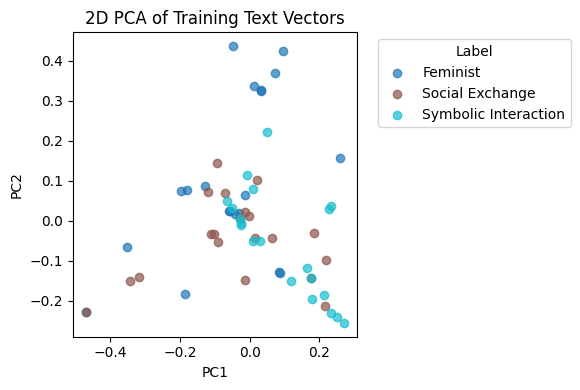

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

X_dense = X.toarray()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

label_encoder = LabelEncoder()
label_ids = label_encoder.fit_transform(df['label'])
label_names = label_encoder.classes_

# Plot out the PCA results
plt.figure(figsize=(6, 4))
cmap = plt.get_cmap('tab10', len(label_names))  # distinct colors for each label

for i, label_name in enumerate(label_names):
    indices = label_ids == i
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], 
                label=label_name, 
                alpha=0.7, 
                color=cmap(i))
    
plt.title("2D PCA of Training Text Vectors")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The next thing we are going to do is to use the Naive Bayes classifier to classify the text data into the three theories, in particular, we will be using the Multinomial Naive Bayes classifier that is suited for text classification. We won't dive too deep into the details of how this works, but we will follow the general steps below for our task:
1. Import the necessary libraries 
2. Fit the vectorized training data to the model
3. Predict the labels of the test data using the trained model
3. Evaluate the model's performance

Here, we are training the model by fitting the vetorized training data to the model. Note that the text and labels are now transformed into a numerical format.

In [4]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

Here, we are creating a small dataset of text data and their corresponding labels in the same format of the training data, and we are using this as the test data for prediction and evaluation of the model's performance. Note that we also need to vectorize the test data using the same TfidfVectorizer. This is important because now this is the format that the model understands. 

In [5]:
test_data = {
    'test_texts': [
        "Family members negotiate roles based on perceived value",
        "Family decisions involve trade-offs and rewards",
        "Siblings help each other expecting future favors",
        "Parents set curfews in exchange for weekend privileges",
        "Couples balance emotional support with personal costs",
        "The family changes as children grow and parents age",
        "Family roles emerge through interaction and shared symbols",
        "Grandparents convey love through storytelling rituals",
        "Holiday meals become symbols of belonging and unity",
        "Children learn who they are by the names relatives call them",
        "The father decides what to buy while the mother obeys",
        "Gender roles shape power within families",
        "Daughters often take on most of the household chores",
        "Patriarchal norms influence who makes financial decisions",
        "Mothers juggle careers and caregiving under unequal expectations"
    ],
    'label': [
        'Social Exchange', 'Social Exchange', 'Social Exchange', 'Social Exchange', 'Social Exchange',
        'Symbolic Interaction', 'Symbolic Interaction', 'Symbolic Interaction', 'Symbolic Interaction', 'Symbolic Interaction',
        'Feminist', 'Feminist', 'Feminist', 'Feminist', 'Feminist'
    ]
}

test_df = pd.DataFrame(test_data)
X_test = vectorizer.transform(test_df['test_texts'])

Now, finally it is time for us to make a prediction using the trained model. We want to output all the predicted labels and their corresponding texts. We are also typically interested in whether the model predicted everything correctly. So in the first place, we will display the predicted labels and their corresponding texts. Then we will also display the texts, the true labels and the predicted labels that we predicted incorrectly. What do you notice about the texts that were predicted incorrectly? Do you think the model is doing a good job?

In [6]:
predictions = model.predict(X_test)

for text, label in zip(test_df['test_texts'], predictions):
    print(f"Text: {text}\n -> Predicted Label: {label}\n")


Text: Family members negotiate roles based on perceived value
 -> Predicted Label: Social Exchange

Text: Family decisions involve trade-offs and rewards
 -> Predicted Label: Social Exchange

Text: Siblings help each other expecting future favors
 -> Predicted Label: Social Exchange

Text: Parents set curfews in exchange for weekend privileges
 -> Predicted Label: Social Exchange

Text: Couples balance emotional support with personal costs
 -> Predicted Label: Social Exchange

Text: The family changes as children grow and parents age
 -> Predicted Label: Social Exchange

Text: Family roles emerge through interaction and shared symbols
 -> Predicted Label: Symbolic Interaction

Text: Grandparents convey love through storytelling rituals
 -> Predicted Label: Symbolic Interaction

Text: Holiday meals become symbols of belonging and unity
 -> Predicted Label: Symbolic Interaction

Text: Children learn who they are by the names relatives call them
 -> Predicted Label: Social Exchange

Text:

In [7]:
test_df['predicted_label'] = predictions

for i, row in test_df.iterrows():
    if row['label'] != row['predicted_label']:
        print(f" Text: {row['test_texts']}\n Actual: {row['label']}\n Predicted: {row['predicted_label']}")

 Text: The family changes as children grow and parents age
 Actual: Symbolic Interaction
 Predicted: Social Exchange
 Text: Children learn who they are by the names relatives call them
 Actual: Symbolic Interaction
 Predicted: Social Exchange


Other than printing the results, we can use metrics like accuracy, precision, recall and f1-score to evaluate the performance of the model. We can also use the confusion matrix to visualize the performance. Here, I will show an example of accuracy score and confusion matrix.

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_df['label'], predictions)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


The Accuracy score measures the proportion of correct predictions made by the model, which is calculated as below:
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

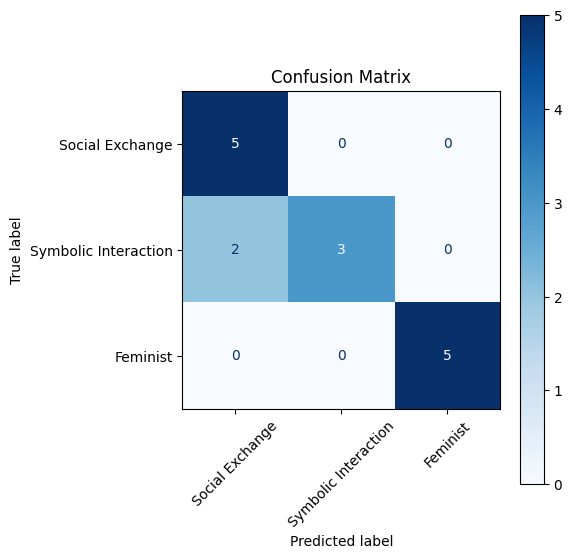

In [9]:
from sklearn import metrics

label_names = ['Social Exchange', 'Symbolic Interaction', 'Feminist']

# Calculate the confusion matrix
cm = metrics.confusion_matrix(
    test_df['label'],
    test_df['predicted_label'],
    labels=label_names
)

# Create a confusion matrix display
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=label_names
)

# Plot it out with matplotlib.pyplot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Here we get to see clearly how two statements that belong to the "Symbolic Interaction" theory were wrongly classified as "Social Exchange", and led to a lower accuracy score.

It might also be useful to visualize the most important features of the model and see what went wrong in the classification using the PCA dimensionality reduction again. This time, we will generate two visualizations alongside each other

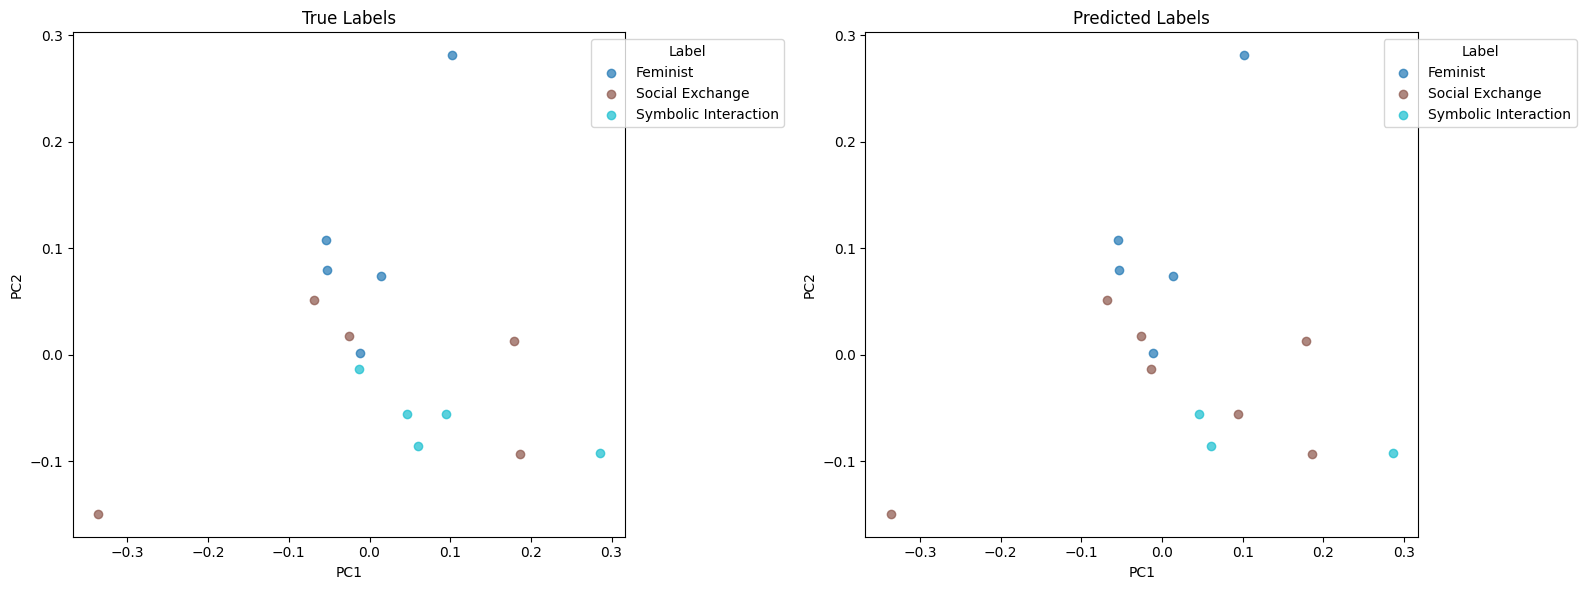

In [10]:
# Create a 2D PCA plot for the test data
X_test_dense = X_test.toarray()
X_test_pca = pca.transform(X_test_dense)

enc_true = LabelEncoder().fit(test_df['label'])
true_ids  = enc_true.transform(test_df['label'])
true_names= enc_true.classes_

enc_pred = LabelEncoder().fit(test_df['predicted_label'])
pred_ids  = enc_pred.transform(test_df['predicted_label'])
pred_names= enc_pred.classes_

# Create a 1×2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: True labels
cmap1 = plt.get_cmap('tab10', len(true_names))
for i, name in enumerate(true_names):
    idx = true_ids == i
    axes[0].scatter(
        X_test_pca[idx, 0],
        X_test_pca[idx, 1],
        label=name,
        alpha=0.7,
        color=cmap1(i)
    )
axes[0].set_title("True Labels")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend(title="Label", loc='upper right', bbox_to_anchor=(1.3, 1))

# Plot 2: Predicted labels
cmap2 = plt.get_cmap('tab10', len(pred_names))
for i, name in enumerate(pred_names):
    idx = pred_ids == i
    axes[1].scatter(
        X_test_pca[idx, 0],
        X_test_pca[idx, 1],
        label=name,
        alpha=0.7,
        color=cmap2(i)
    )
axes[1].set_title("Predicted Labels")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].legend(title="Label", loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()


Did you spot where the two wrongly classified points are? What can you say about the two points? How do you think we can improve the model?

## Part 2: Zero-shot Text Classification with Hugging Face Transformers
In this part of the notebook, we will use a pre-trained model from the Hugging Face Transformers library to perform zero-shot text classification. This means that we will use a model that has already been trained on a large corpus of text data and can classify text into multiple categories without the need for additional training. In fact, it only requires the labels we want to classify the text into and the additional description of the labels.

While this sounds like magic, it is actually based on the same principles of vectorization and classification that we did in Part 1. However, although it seems convenient, just like asking ChatGPT to do the work, it is not always accurate and can be biased by various factors. 

## References

- [QuantEcon DataScience: Working with Text](https://datascience.quantecon.org/applications/working_with_text.html)
- [Scikit-Learn: MultinomialNB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
- [Scikit-Learn: TfidfVectorizer Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
- [AI for Humanists: Text Classification and Zero-Shot Prompting with LLMs (FLAN-T5)](https://colab.research.google.com/drive/1QIG-3bIo1BHVWWlS22-1XItlZRrGSMNe?usp=sharing)